<a href="https://colab.research.google.com/github/Palak-bindal/Capstone-Play-store/blob/Branch/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Q1: Best App (in terms of downloads) in each genre?

Q2: Finding all the apps which have 4+ rating?

Q3: Most expensive application & their genre and installs?


Q4: List of application Famous among teens and their Genre?

Q5: Average Revenue from  downloads by category?

Q6: Relation b/w most downloads and ratings.(Corr Graph)

Q7: Relation Between total num of apps download per category in the particular period of time ?


In [225]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle, islice
from datetime import date


In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
working_file = "/content/drive/MyDrive/Almabetter/Module 1/Capstone Project 1/Copy of Play Store Data.csv"
playstore_df = pd.read_csv(working_file)

#Data Exploration

In [136]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [137]:
playstore_df.shape

(10841, 13)

In [138]:
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [139]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [140]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [141]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data Cleaning- Making data relevant for our use

In [142]:
# will check one by one if any column as null values or wrong data

#start with category column as app column in not changeable
playstore_df['Category'].isna().sum()

0

In [143]:
#checking unique data of Category Column
print(playstore_df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [144]:
# there is an invalid entry in the category column
#lets check the whole row
playstore_df.loc[playstore_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [145]:
#Rating should be between 1-5 while in this row it is 19
#lets see if other rows also have rating>5
playstore_df[playstore_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [146]:
#No other row has rating>5 other than 10472, it seems in this row values got shifted from right to left
#bcs of invalid data, drop this row
playstore_df.drop ([10472],axis=0 ,inplace=True)

#its dropped

In [147]:
#lets check
playstore_df[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [148]:
#Lets move to clean Rating column
#checking if there are any null values
playstore_df['Rating'].isna().sum()

1474

In [149]:
#Lets clean the Rating column with the help of lambda function

playstore_df['Rating'] = playstore_df['Rating'].fillna(playstore_df['Rating'].median())
playstore_df['Rating'].isna().sum()

playstore_df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

Text(0, 0.5, 'Frequencies')

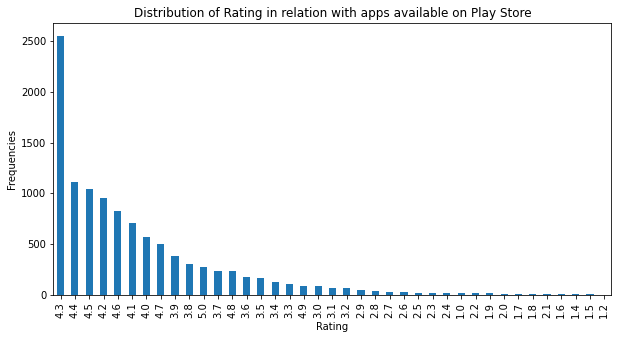

In [226]:
import matplotlib.pyplot as plt
my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(playstore_df)))


# Barchart
# Historgram of frequencies 
playstore_df.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (10, 5), title = 'Distribution of Rating in relation with apps available on Play Store');
plt.xlabel('Rating')
plt.ylabel('Frequencies')

#It shows that most of the apps got the rating 4.3 

In [158]:
#Checking Reviews column
playstore_df.Reviews.isnull().sum() 
#none of the values is null

0

In [159]:
#checking Size Column
playstore_df.Size.isnull().sum() 


0

In [177]:
#checking Size Column
playstore_df.Installs.isnull().sum()
#none of the values is null

#now replacing ',' with ''
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

#now replacing '+' with ''
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: float(x))

ValueError: ignored

In [193]:
#filling null values with mode of Type column
playstore_df['Type'].fillna(str(playstore_df['Type'].mode()), inplace = True)

#checking Type Column
playstore_df.Type.isnull().sum()

0

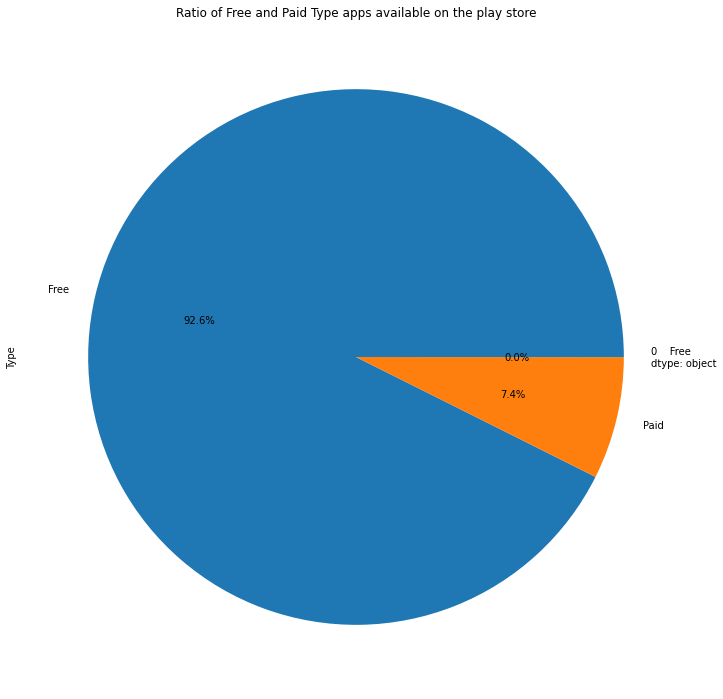

In [194]:
# visualizing the free and paid apps in pie chart
playstore_df.Type.value_counts().plot.pie(y = playstore_df.Type, figsize = (12, 14), autopct = '%1.1f%%', title = 'Ratio of Free and Paid Type apps available on the play store');

#It shows only 7.4% apps are paid, rest all are free

In [200]:
# checking price column
playstore_df['Price'].isnull().sum()

0

In [203]:
# now checking all the paid apps
playstore_df[playstore_df['Type'] == 'Paid'].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100 000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100 000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


In [208]:
#delete $ sign 
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

#changing str values to float
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))


In [209]:
playstore_df[playstore_df['Type'] == 'Paid'].head(2)
# checking price column 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100 000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100 000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


In [211]:
# cleaning Content Rating Column
playstore_df['Content Rating'].isnull().sum()

0

In [235]:
#checking unique values of Content Rating
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

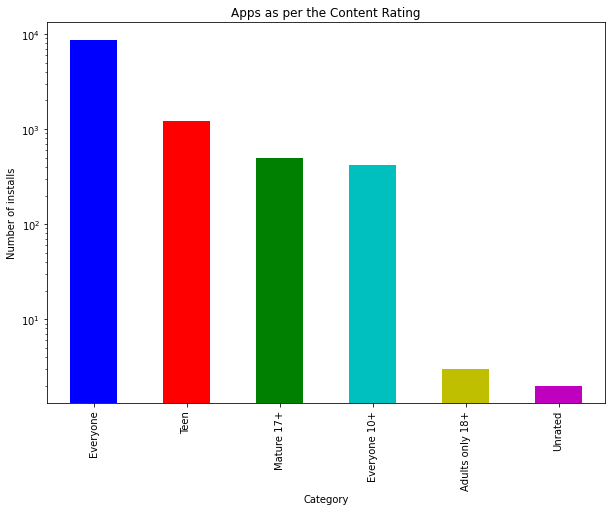

In [238]:
# It is good but We cant see the data for some columns. Use log scale for y axis
playstore_df['Content Rating'].value_counts().plot(kind = 'bar', title = 'Apps as per the Content Rating', color = my_colors, figsize = (10,7)) 
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.yscale('log')

#most of the apps are in everyone and least are in unrated

In [243]:
#checking Genres column
playstore_df.Genres.isnull().sum()

0